<center><h1><b>DATA ANALYSIS OF FILIPINO FAMILY INCOME AND EXPENDITURE</b></h1></center>
<center><h3>Analysts: Bianca Sophia S. Roxas &amp; Francis Raven Salamo, BSIT-3A</h3></center>

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

In [8]:
filcome = pd.read_csv("DATASET\\Family Income and Expenditure.csv")
filcome

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [9]:
region_coordinates = {
    'NCR': [14.5995, 120.9842],
    'CAR': [16.4023, 120.5960],
    'I - Ilocos Region': [16.0333, 120.3333],
    'II - Cagayan Valley': [17.6131, 121.7269],
    'III - Central Luzon': [15.4828, 120.7120],
    'IVA - CALABARZON': [14.1000, 121.3000],
    'IVB - MIMAROPA': [12.2286, 121.3360],
    'V - Bicol Region': [13.3333, 123.5000],
    'VI - Western Visayas': [10.7202, 122.5621],
    'VII - Central Visayas': [10.3157, 123.8854],
    'VIII - Eastern Visayas': [11.2445, 125.0037],
    'IX - Zasmboanga Peninsula': [7.8439, 123.8553],  
    'X - Northern Mindanao': [8.4542, 124.6319],
    'XI - Davao Region': [7.1907, 125.4553],
    'XII - SOCCSKSARGEN': [6.1200, 125.1745],
    'Caraga': [8.7202, 125.5248],
    ' ARMM': [6.9478, 124.2422], 
}

In [10]:
# Calculate the average center of all regions
avg_lat = sum([coords[0] for coords in region_coordinates.values()]) / len(region_coordinates)
avg_lon = sum([coords[1] for coords in region_coordinates.values()]) / len(region_coordinates)

## **QUESTIONS** ##

<h1>Q1: Where is transportation expenditure the highest?</h1>

In [5]:
transpo_avg = filcome.groupby("Region")["Transportation Expenditure"].mean().to_frame()
transpo_avg.columns = ["Avg Transportation Expenditure"]
transpo_avg = transpo_avg.sort_values(by="Avg Transportation Expenditure", ascending=False)

transpo_avg


,Avg Transportation Expenditure
Region,
NCR,22546.104116
IVA - CALABARZON,18396.807304
III - Central Luzon,15602.433735
XI - Davao Region,11460.115290
VII - Central Visayas,10843.884298
CAR,10700.991304
I - Ilocos Region,10244.478705
X - Northern Mindanao,10079.627981
XII - SOCCSKSARGEN,9788.103676


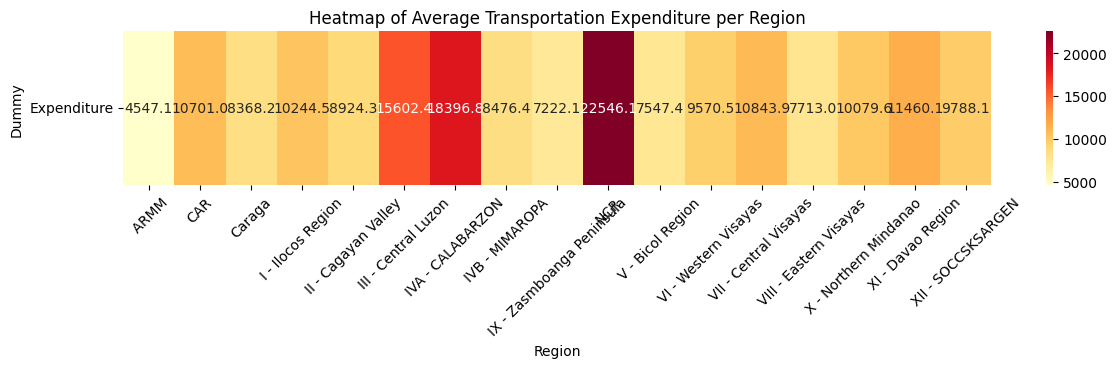

In [6]:
# Compute the average transportation expenditure
transpo_avg = filcome.groupby("Region")["Transportation Expenditure"].mean().sort_values(ascending=False).to_frame()
transpo_avg.columns = ["Avg Transportation Expenditure"]

# Create a dummy second dimension to visualize as a heatmap
heatmap_data = transpo_avg.copy()
heatmap_data["Dummy"] = "Expenditure"

# Pivot it to get a 2D matrix (rows: dummy label, cols: regions)
heatmap_matrix = heatmap_data.pivot_table(index="Dummy", columns=heatmap_data.index, values="Avg Transportation Expenditure")

# Plot
plt.figure(figsize=(14, 2))
sns.heatmap(heatmap_matrix, annot=True, cmap="YlOrRd", cbar=True, fmt=".1f")
plt.title("Heatmap of Average Transportation Expenditure per Region")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight 1


Transportation spending is highest in the National Capital Region (NCR), with an average expenditure of 22,546 pesos. This is followed by CALABARZON and Central Luzon, which also show relatively high transportation expenses. Generally, regions with more urban development and greater access to transportation infrastructure tend to spend more on transportation. On the other hand, regions like ARMM and some parts of Mindanao have the lowest transportation spending, reflecting less access or lower usage of transportation services.


<h1> Q2. What is the average total household income per region?</h1>

In [7]:
# Group by region and calculate the average total household income
region_income_avg = filcome.groupby("Region")["Total Household Income"].mean().to_frame()
region_income_avg.columns = ["Average Household Income"]
region_income_avg = region_income_avg.sort_values(by="Average Household Income", ascending=False)

region_income_avg


,Average Household Income
Region,
NCR,420861.861501
IVA - CALABARZON,303360.536040
III - Central Luzon,292965.181650
CAR,269540.484638
XI - Davao Region,238115.891251
I - Ilocos Region,238110.084327
II - Cagayan Valley,236778.221721
VII - Central Visayas,234909.314050
VI - Western Visayas,220481.260260


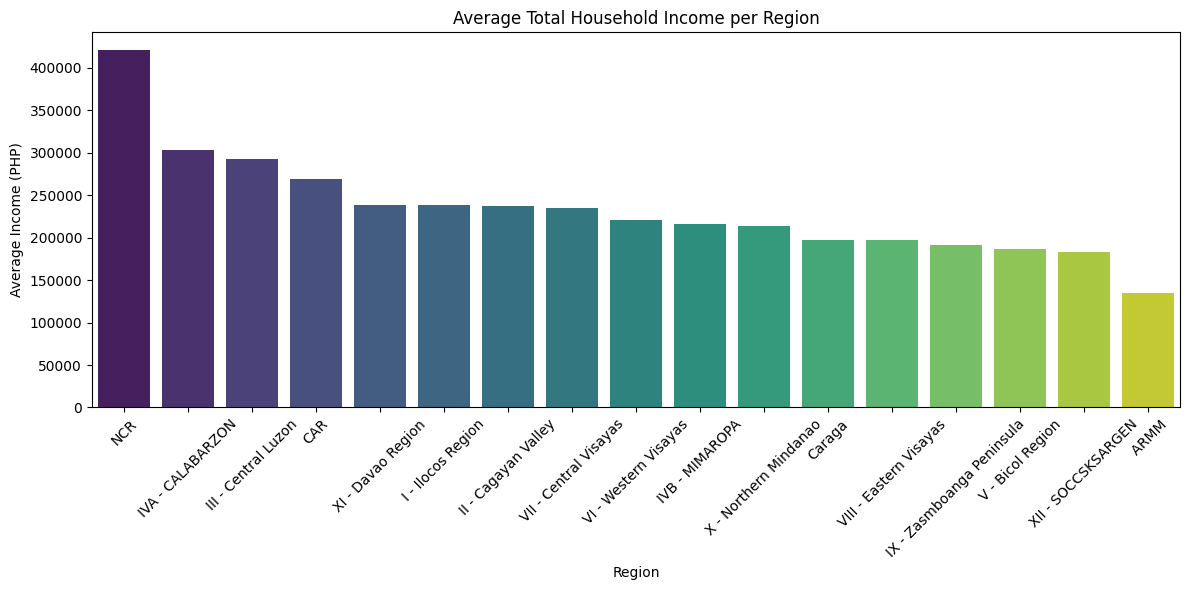

In [8]:

income_avg = filcome.groupby("Region")["Total Household Income"].mean().sort_values(ascending=False).to_frame()
income_avg.columns = ["Average Household Income"]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=income_avg.index, y="Average Household Income", data=income_avg, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Income (PHP)")
plt.xlabel("Region")
plt.title("Average Total Household Income per Region")
plt.tight_layout()
plt.show()

### Insight 2

The National Capital Region (NCR) has the highest average total household income among all regions, significantly higher than the others. CALABARZON and Central Luzon follow as the next highest income regions. Generally, regions in Luzon and more urbanized areas have higher household incomes. In contrast, regions like ARMM and parts of Mindanao have much lower average household incomes, indicating economic disparities across the country. This suggests that economic opportunities are more concentrated in urban and developed regions.



<h1>Q3. Which region has the highest average food expenditure?</h1>

In [9]:
# Group by region and calculate average total food expenditure
food_exp = filcome.groupby("Region")["Total Food Expenditure"].mean().to_frame()
food_exp.columns = ["Average Food Expenditure"]
food_exp = food_exp.sort_values(by="Average Food Expenditure", ascending=False)

food_exp


,Average Food Expenditure
Region,
NCR,127080.456659
IVA - CALABARZON,105333.949543
III - Central Luzon,99726.701576
VII - Central Visayas,84307.184179
XI - Davao Region,81126.927228
I - Ilocos Region,80649.937819
CAR,80352.780290
VI - Western Visayas,79829.025956
V - Bicol Region,76811.412217


In [10]:
# Prepare heatmap data
heat_data = []
for region, row in food_exp.iterrows():
    coords = region_coordinates.get(region)
    if coords:
        heat_data.append([coords[0], coords[1], row["Average Food Expenditure"]])
# Generate map
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)
HeatMap(heat_data, radius=15).add_to(m)

m.save("avg_food_exp.html")
m

### Insight 3

The National Capital Region (NCR) spends the most on food, with the highest average food expenditure among all regions. Following NCR, CALABARZON and Central Luzon also have high average food spending. Regions with lower food expenditure tend to be in more rural or less urbanized areas, like ARMM and Northern Mindanao. This suggests that people in urban or more developed regions tend to spend more on food compared to those in less developed areas.

<h1>Q4. What is the most common household head occupation per region?</h1>

In [11]:
# Find the most common occupation per region
occupation_mode = filcome.groupby("Region")["Household Head Occupation"].agg(lambda x: x.mode()[0]).to_frame()
occupation_mode.columns = ["Most Common Occupation"]

# Count how many households in each region have the most common occupation
occupation_mode["Count"] = occupation_mode.apply(
    lambda row: filcome[(filcome["Region"] == row.name) & 
                        (filcome["Household Head Occupation"] == row["Most Common Occupation"])].shape[0],
    axis=1
)

occupation_mode


,Most Common Occupation,Count
Region,,
ARMM,Corn farmers,346
CAR,Rice farmers,376
Caraga,Farmhands and laborers,129
I - Ilocos Region,Rice farmers,324
II - Cagayan Valley,Farmhands and laborers,484
III - Central Luzon,Farmhands and laborers,287
IVA - CALABARZON,General managers/managing proprietors in trans...,234
IVB - MIMAROPA,Rice farmers,176
IX - Zasmboanga Peninsula,Corn farmers,260


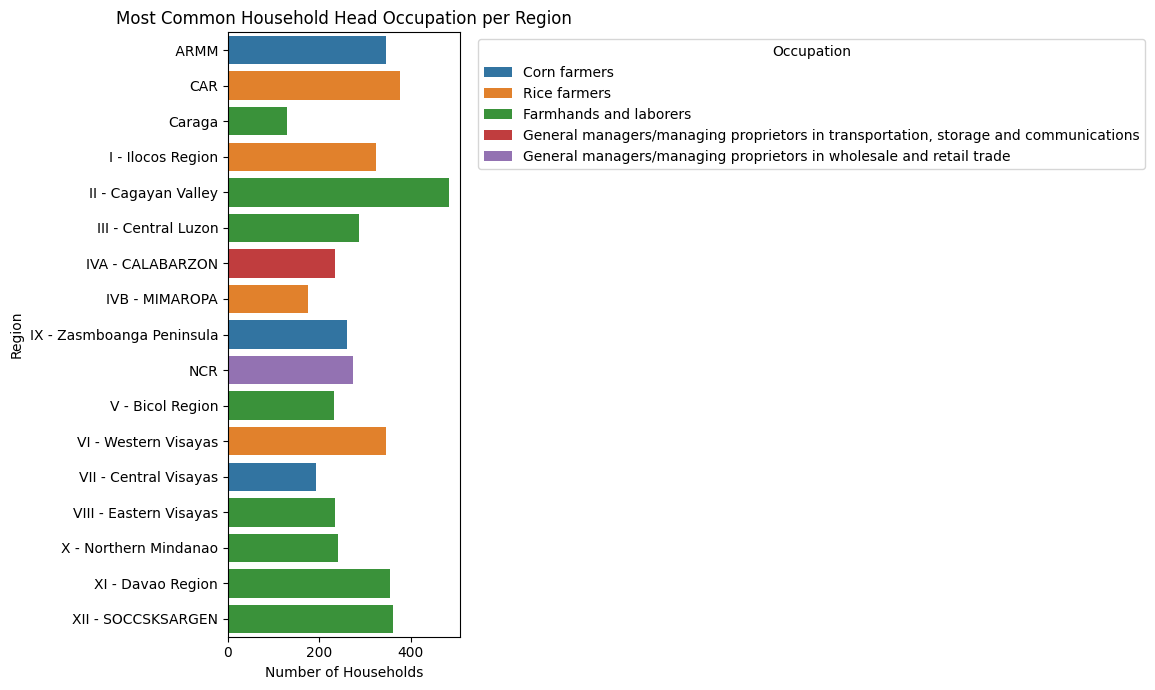

In [12]:
occupation_mode = filcome.groupby("Region")["Household Head Occupation"].agg(lambda x: x.mode()[0]).to_frame()
occupation_mode.columns = ["Most Common Occupation"]

# Step 2: Count how many households have this common occupation in each region
occupation_mode["Count"] = occupation_mode.apply(
    lambda row: filcome[
        (filcome["Region"] == row.name) &
        (filcome["Household Head Occupation"] == row["Most Common Occupation"])
    ].shape[0],
    axis=1
)

# Step 3: Reset index for plotting
occupation_mode_plot = occupation_mode.reset_index()

# Step 4: Create horizontal bar plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x="Count",
    y="Region",
    data=occupation_mode_plot,
    hue="Most Common Occupation",
    dodge=False,
    palette="tab10"
)

plt.title("Most Common Household Head Occupation per Region")
plt.xlabel("Number of Households")
plt.ylabel("Region")
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insight 4

Most household heads in rural regions work in farming, either as farmers or farm laborers. In contrast, urban areas like NCR and CALABARZON have more household heads working as managers in businesses. This shows how jobs differ between farming communities and cities.



<h1>Q5. What is the average education expenditure per region?</h1>

In [11]:
# Calculate average education expenses
edu_exp = filcome.groupby("Region")["Education Expenditure"].mean().to_frame()
edu_exp.columns = ["Average Education Expenditure"]
edu_exp = edu_exp.sort_values(by="Average Education Expenditure", ascending=False)

edu_exp


,Average Education Expenditure
Region,
NCR,12021.555206
CAR,10560.509565
IVA - CALABARZON,10028.401249
III - Central Luzon,8486.333642
XI - Davao Region,7329.742028
X - Northern Mindanao,7096.029677
VII - Central Visayas,7007.647776
IVB - MIMAROPA,6736.542034
XII - SOCCSKSARGEN,6582.594722


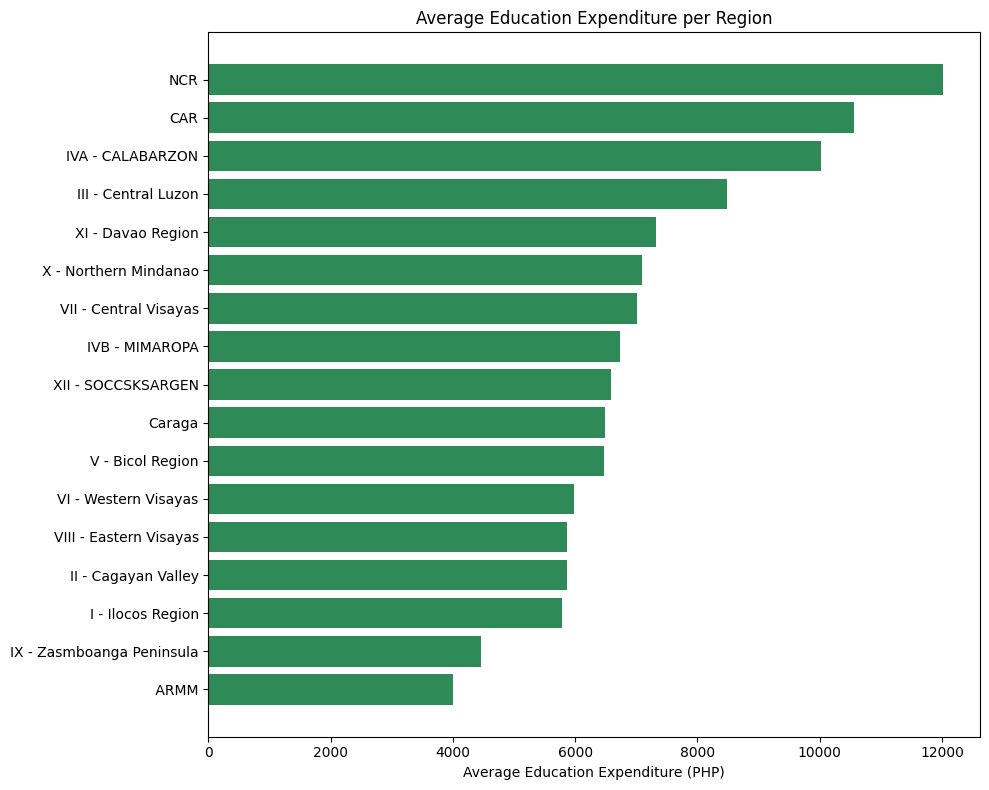

In [13]:
edu_exp = filcome.groupby("Region")["Education Expenditure"].mean().reset_index()
edu_exp.columns = ["Region", "Average Education Expenditure"]

# Sort the data for plotting
edu_exp_sorted = edu_exp.sort_values(by="Average Education Expenditure", ascending=True)

# Plot horizontal bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(edu_exp_sorted["Region"], edu_exp_sorted["Average Education Expenditure"], color="seagreen")
plt.xlabel("Average Education Expenditure (PHP)")
plt.title("Average Education Expenditure per Region")
plt.tight_layout()
plt.show()

### Insight 5

NCR spends the most on education, with an average of about 12,021 PHP per household.

CAR and IVA - CALABARZON also spend quite a lot, with averages over 10,000 PHP.

Regions like III - Central Luzon and XI - Davao Region spend between 7,300 to 8,500 PHP.

The lowest spending is seen in ARMM, with an average of around 4,000 PHP.

This shows that urban and more developed regions tend to spend more on education, while some of the more rural or less developed areas spend less on average.


<h1>Q6: Which region spends the most on medical care?</h1>

In [15]:
med_avg = filcome.groupby("Region")["Medical Care Expenditure"].mean().to_frame()
med_avg.columns = ["Avg Medical Expenditure"]
med_avg = med_avg.sort_values(by="Avg Medical Expenditure", ascending=False)

med_avg


,Avg Medical Expenditure
Region,
IVA - CALABARZON,10735.019942
III - Central Luzon,10135.666976
NCR,9862.722276
CAR,9164.489855
I - Ilocos Region,7722.497871
VII - Central Visayas,7240.165289
VI - Western Visayas,6987.667134
X - Northern Mindanao,6790.201378
XII - SOCCSKSARGEN,6624.070688


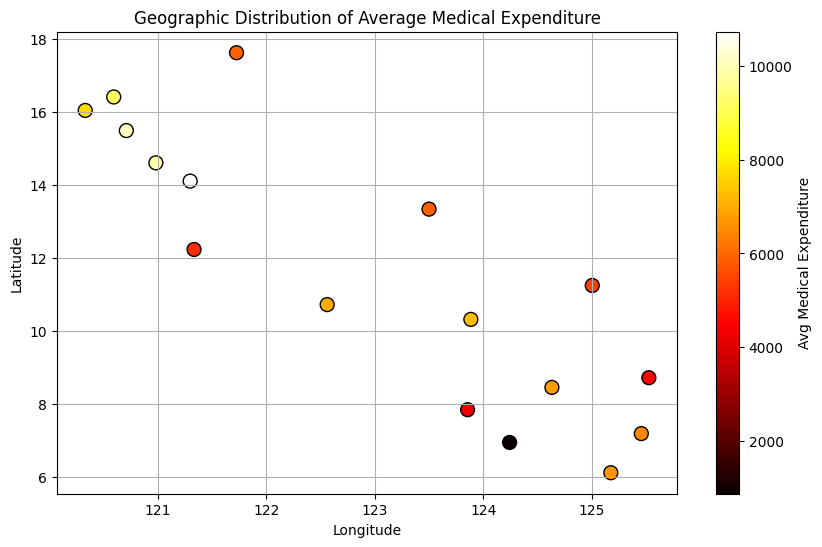

In [16]:
latitudes = []
longitudes = []
expenditures = []

for region, row in med_avg.iterrows():
    coords = region_coordinates.get(region)
    if coords:
        latitudes.append(coords[0])
        longitudes.append(coords[1])
        expenditures.append(row["Avg Medical Expenditure"])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(longitudes, latitudes, c=expenditures, cmap='hot', s=100, edgecolor='black')
plt.colorbar(scatter, label='Avg Medical Expenditure')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Average Medical Expenditure")
plt.grid(True)
plt.show()

### Insight 6

IVA - CALABARZON spends the most on medical care compared to all other regions. This means that, on average, households there spend more money on health services, medicines, and medical treatments. This could be because the area has better access to healthcare facilities or people there prioritize health spending more than other regions.


<h1>Q7:  What is the average imputed rental value of houses by region?</h1> 

In [17]:
rent_avg = filcome.groupby("Region")["Imputed House Rental Value"].mean().to_frame()
rent_avg.columns = ["Avg Imputed Rent"]
rent_avg = rent_avg.sort_values(by="Avg Imputed Rent", ascending=False)

rent_avg


,Avg Imputed Rent
Region,
NCR,51101.155932
IVA - CALABARZON,27064.071120
CAR,26579.888696
III - Central Luzon,23568.735867
VII - Central Visayas,21495.426210
XI - Davao Region,17753.793949
I - Ilocos Region,17481.899489
VI - Western Visayas,15770.256051
X - Northern Mindanao,15385.284579


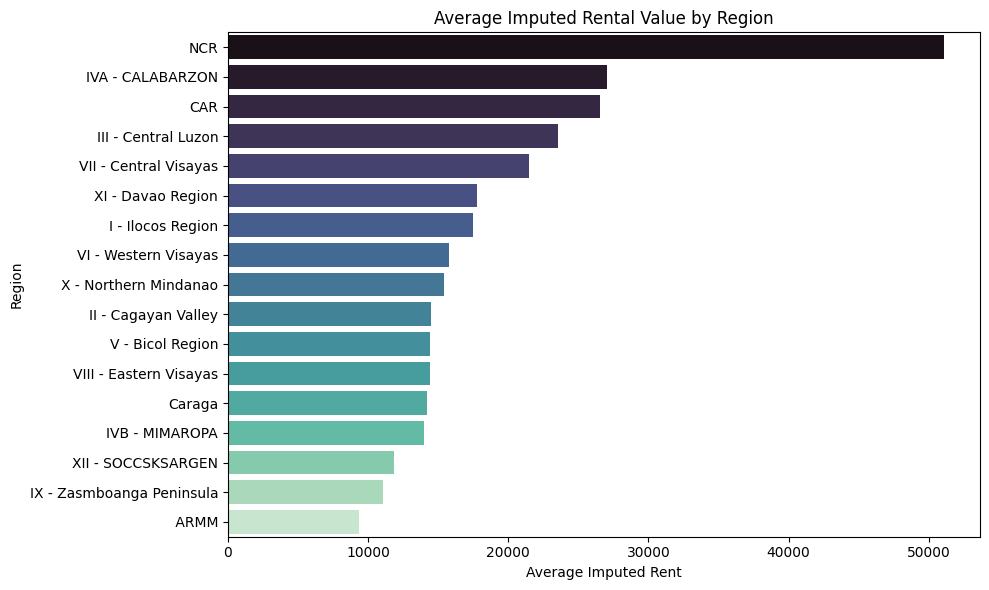

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=rent_avg["Avg Imputed Rent"], y=rent_avg.index, palette='mako')
plt.xlabel("Average Imputed Rent")
plt.ylabel("Region")
plt.title("Average Imputed Rental Value by Region")
plt.tight_layout()
plt.show()


### Insight 7

The National Capital Region (NCR) has the highest average imputed rental value of houses, at about 51,101 PHP. This means houses in NCR are valued much higher in terms of rental cost compared to other regions. Following NCR are IVA - CALABARZON and CAR, with average values around 27,064 PHP and 26,580 PHP respectively.

Regions like ARMM have the lowest average imputed rental value, around 9,334 PHP, indicating that housing rental values are much lower there.

This shows that housing values are generally higher in urbanized or more developed regions and lower in less developed or rural areas.

<h1>Q8. How do other expenses vary across regions?</h1>

In [19]:
lst = list(filcome.columns)
print(lst)

# Define the list of other expense columns to analyze
other_expense_columns = [
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Restaurant and hotels Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

# Group by region, calculate mean expenses, and round to 2 decimals
region_expenses = (
    filcome
    .groupby("Region")[other_expense_columns]
    .mean()
    .round(2)
    .copy()
)

# Compute total other expenses per region for sorting
region_expenses["Total Other Expenses"] = region_expenses.sum(axis=1)

# Sort regions by total other expenses in descending order
region_expenses_sorted = region_expenses.sort_values(by="Total Other Expenses", ascending=False)

# Display the sorted result
region_expenses_sorted

['Total Household Income', 'Region', 'Total Food Expenditure', 'Main Source of Income', 'Agricultural Household indicator', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Imputed House Rental Value', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses', 'Total Income from Entrepreneurial Acitivites', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of

,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Restaurant and hotels Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Other Expenses
Region,,,,,,,,,,,,
NCR,6976.98,93160.11,51101.16,9862.72,22546.10,10009.46,12021.56,21965.46,40036.05,5200.50,451.20,273331.30
IVA - CALABARZON,6081.77,49271.97,27064.07,10735.02,18396.81,6445.31,10028.40,17305.80,27326.60,6715.69,3022.15,182393.59
CAR,5720.25,43715.85,26579.89,9164.49,10700.99,3885.42,10560.51,12101.42,9588.11,5944.18,28428.27,166389.38
III - Central Luzon,5635.67,44391.07,23568.74,10135.67,15602.43,5428.20,8486.33,14893.83,19904.11,5991.85,11281.83,165319.73
II - Cagayan Valley,3758.88,27491.41,14501.96,5908.83,8924.35,2832.51,5867.15,10398.46,12534.84,4293.62,39485.11,135997.12
VII - Central Visayas,4376.98,38306.43,21495.43,7240.17,10843.88,3731.23,7007.65,10408.07,15706.88,5979.88,5332.65,130429.25
XI - Davao Region,4769.49,31926.51,17753.79,6485.55,11460.12,3193.57,7329.74,11255.10,12815.25,5917.80,15895.81,128802.73
I - Ilocos Region,5185.35,32065.86,17481.90,7722.50,10244.48,3906.28,5780.37,11736.45,16000.73,5233.20,13266.89,128624.01
IVB - MIMAROPA,4989.00,26010.86,13986.63,5141.53,8476.44,2523.54,6736.54,10534.42,7952.20,3954.20,23055.16,113360.52


In [20]:
import folium

# Calculate average center of all region coordinates
avg_lat = sum(lat for lat, _ in region_coordinates.values()) / len(region_coordinates)
avg_lon = sum(lon for _, lon in region_coordinates.values()) / len(region_coordinates)

# Create the folium map centered on the average region location
exp = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)

# Add expense data as circle markers on the map
for region, (lat, lon) in region_coordinates.items():
    if region in region_expenses_sorted.index:
        total_expense = region_expenses_sorted.loc[region, 'Total Other Expenses']
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color='green',             # Outline color
            fill=True,
            fill_color='lightgreen',   # Fill color
            fill_opacity=0.7,
            popup=folium.Popup(
                f"<b>Region:</b> {region}<br><b>Total Other Expenses:</b> ₱{total_expense:,.2f}",
                max_width=250
            )
        ).add_to(exp)

# Save map to an HTML file
exp.save("expense_map.html")
exp


### Insight 8:

🔹 Top Spending Region

NCR (Metro Manila) spends the most on other expenses — ₱273,331.30.

High costs are seen in housing, rent, transport, and restaurants.

🔹 Lowest Spending Region

ARMM has the lowest total — ₱91,654.41.

Lower spending is seen across all categories like housing, medical care, and food.

🔹 Most Common High Expenses

Housing and Water


Imputed Rent


These are the biggest costs in nearly every region.

🔹 Rural vs Urban Patterns

Urban regions (like NCR, CALABARZON) spend more on restaurants, clothing, and transport.


Rural regions (like CAR, Cagayan Valley) spend more on farming and gardening.

🔹 Middle-Spending Regions

Central Visayas, Davao, and Ilocos have moderate expenses.


Their spending is balanced across basic needs and small leisure.

<h3>Summary</h3>

Spending varies by region based on lifestyle, development, and location.

Urban = high cost of living, Rural = more farming and basic needs.

<h1> Q9 In which region do households own the most cars?</h1>

In [14]:
# Group by Region and sum the number of cars, jeeps, and vans
cars_by_region = (
    filcome.groupby('Region')["Number of Car, Jeep, Van"]
    .sum()
    .reset_index()
    .rename(columns={"Number of Car, Jeep, Van": "Total Vehicles"})
)

# Sort the result in descending order to get regions with most vehicles on top
cars_by_region_sorted = cars_by_region.sort_values(by="Total Vehicles", ascending=False)

# Display the sorted data
print("\033[1mTotal Number of Cars, Jeeps, and Vans Owned per Region\033[0m\n")
print(cars_by_region_sorted)


Total Number of Cars, Jeeps, and Vans Owned per Region

                       Region  Total Vehicles
9                         NCR             626
6            IVA - CALABARZON             462
5         III - Central Luzon             347
1                         CAR             237
3           I - Ilocos Region             211
12      VII - Central Visayas             195
11       VI - Western Visayas             186
15          XI - Davao Region             185
4         II - Cagayan Valley             169
14      X - Northern Mindanao             137
16         XII - SOCCSKSARGEN             130
2                      Caraga             119
13     VIII - Eastern Visayas             102
10           V - Bicol Region              89
8   IX - Zasmboanga Peninsula              81
7              IVB - MIMAROPA              69
0                        ARMM              29


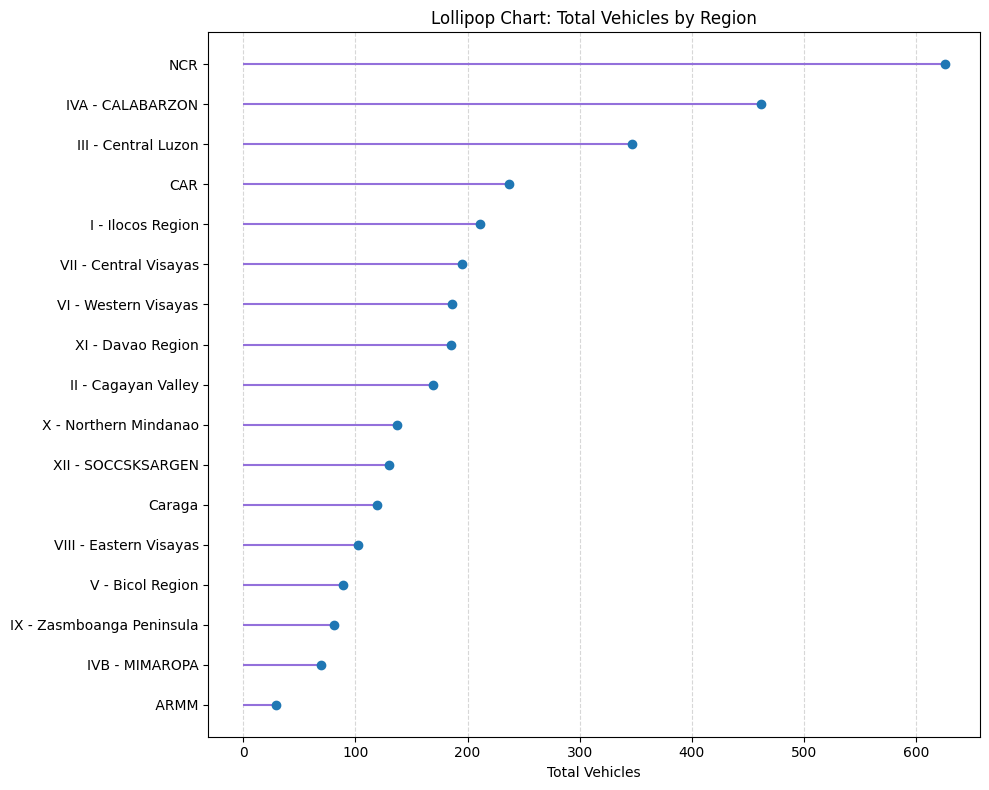

In [16]:
cars_by_region_sorted = cars_by_region_sorted.sort_values("Total Vehicles")

# Plot
plt.figure(figsize=(10, 8))
plt.hlines(y=cars_by_region_sorted["Region"], xmin=0, xmax=cars_by_region_sorted["Total Vehicles"], color='mediumpurple')
plt.plot(cars_by_region_sorted["Total Vehicles"], cars_by_region_sorted["Region"], "o")

plt.xlabel("Total Vehicles")
plt.title("Lollipop Chart: Total Vehicles by Region")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insight 9:

People tend to own more cars in places that are more developed and have bigger cities.

Metro Manila (NCR) has the most cars, with nearby regions also having many cars because they are more developed.

Areas with fewer roads, less money, and smaller towns have fewer cars.

This shows that richer and more developed places have better access to cars and transportation than poorer areas.

<h1>Q10:Which region in the Philippines spends the most on non-food household expenses on average?</h1>

In [47]:
other_expenses_cols = [
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Restaurant and hotels Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

# Calculate total other expenses per household
filcome["Total_Other_Expenses"] = filcome[other_expenses_cols].sum(axis=1)

# Calculate average total other expenses per region, rounded to 2 decimals
avg_other_expense_per_region = filcome.groupby("Region")["Total_Other_Expenses"].mean().round(2)

# Identify region with highest average other expenses
top_region = avg_other_expense_per_region.idxmax()
top_expense = avg_other_expense_per_region.max()

print(f"The region with the highest average non-food household expenses is {top_region}, with an average amount of ₱{top_expense}.")


The region with the highest average non-food household expenses is NCR, with an average amount of ₱273331.28.


In [49]:
from folium.plugins import HeatMap

# Reset index to turn Region back into a column
avg_other_expense_per_region = avg_other_expense_per_region.reset_index()

# Map latitude and longitude from region_coordinates dictionary
avg_other_expense_per_region["Latitude"] = avg_other_expense_per_region["Region"].map(
    lambda region: region_coordinates.get(region, [None, None])[0]
)
avg_other_expense_per_region["Longitude"] = avg_other_expense_per_region["Region"].map(
    lambda region: region_coordinates.get(region, [None, None])[1]
)

# Drop rows with missing lat/lon data
avg_other_expense_per_region = avg_other_expense_per_region.dropna(subset=["Latitude", "Longitude"])

# Initialize the map centered on the Philippines
avg_exp_map = folium.Map(location=[12.8797, 121.7740], zoom_start=6)

# Prepare heatmap data: latitude, longitude, and average other expenses
heat_data = list(zip(
    avg_other_expense_per_region["Latitude"],
    avg_other_expense_per_region["Longitude"],
    avg_other_expense_per_region["Total_Other_Expenses"]
))

# Add heatmap layer to the map
HeatMap(
    heat_data,
    radius=15,
    blur=10,
    max_val=avg_other_expense_per_region["Total_Other_Expenses"].max()
).add_to(avg_exp_map)

# Save the heatmap as HTML file
avg_exp_map.save("other_expenses_heatmap.html")

# Display the map
avg_exp_map


### Insight 10:

Metro Manila (NCR) spends the most on non-food household expenses on average compared to other regions. This likely reflects its higher cost of living, greater access to various services, and generally higher income levels. People in NCR tend to spend more on housing, transportation, communication, education, and other non-food needs.

<h1>Q11: Which regions earn the most from entrepreneurial activities?</h1>

In [25]:
filcome.rename(columns={"Total Income from Entrepreneurial Acitivites": "Total Income from Entrepreneurial Activities"}, inplace=True)

entrep_income_per_region = filcome.groupby("Region")[
    ["Total Income from Entrepreneurial Activities"]
].mean().round(2).sort_values(by="Total Income from Entrepreneurial Activities", ascending=False)

print(entrep_income_per_region)


                           Total Income from Entrepreneurial Activities
Region                                                                 
 ARMM                                                          79547.60
II - Cagayan Valley                                            71534.28
IVB - MIMAROPA                                                 70514.19
CAR                                                            64282.41
NCR                                                            62477.07
III - Central Luzon                                            61263.36
XI - Davao Region                                              55533.53
IX - Zasmboanga Peninsula                                      50011.77
IVA - CALABARZON                                               49382.95
I - Ilocos Region                                              47923.23
VIII - Eastern Visayas                                         47450.77
XII - SOCCSKSARGEN                                             4

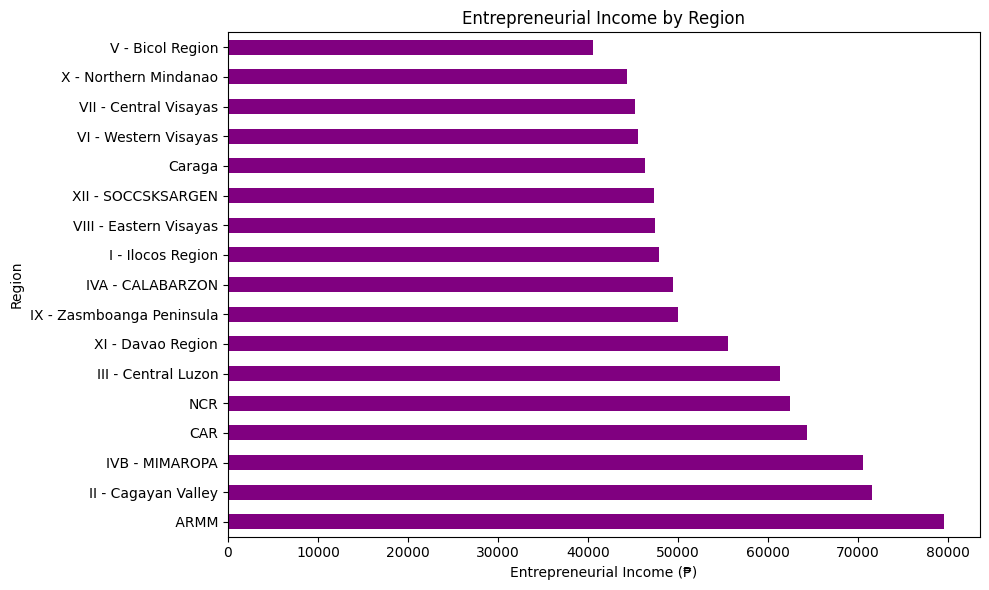

In [26]:
entrep_income_per_region.sort_values("Total Income from Entrepreneurial Activities", ascending=False).plot(
    kind='barh', 
    legend=False, 
    figsize=(10, 6), 
    color='purple'
)
plt.xlabel("Entrepreneurial Income (₱)")
plt.ylabel("Region")
plt.title("Entrepreneurial Income by Region")
plt.tight_layout()
plt.show()

<b>Insight 11:</b> 

ARMM has the highest average income from businesses, followed by II - Cagayan Valley, IVB - MIMAROPA, and CAR. Even though NCR is a big city and economic center, its average business income is a bit lower. This means that business earnings aren’t just in big cities—some smaller or less developed regions also make a lot from local businesses.

<h1>Q12. Which region spends the most on clothing and footwear?
</h1>

In [27]:
clothing_avg = filcome.groupby("Region")["Clothing, Footwear and Other Wear Expenditure"].mean().to_frame()
clothing_avg.columns = ["Avg Clothing Expenditure"]
clothing_avg = clothing_avg.sort_values(by="Avg Clothing Expenditure", ascending=False)

clothing_avg


,Avg Clothing Expenditure
Region,
NCR,6976.976513
IVA - CALABARZON,6081.771264
CAR,5720.245797
III - Central Luzon,5635.670992
I - Ilocos Region,5185.354344
IVB - MIMAROPA,4989.000000
Caraga,4888.465208
VI - Western Visayas,4820.843914
X - Northern Mindanao,4813.401166


In [28]:
heat_data = []
for region, row in clothing_avg.iterrows():
    coords = region_coordinates.get(region)
    if coords:
        heat_data.append([coords[0], coords[1], row["Avg Clothing Expenditure"]])

ft = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)
HeatMap(heat_data).add_to(ft)

ft.save("clothing_expenditure_heatmap.html")
ft


### Insight 12:
The region that spends the most on clothing and footwear is NCR (National Capital Region) with an average expenditure of 6,976.98 pesos. It is followed by IVA - CALABARZON and CAR. This suggests that people in more urbanized and economically developed regions tend to spend more on clothing and footwear.

<h1>Q13: Which region has the highest average housing and water expenditure?
</h1>

In [29]:
# Calculate average housing and water expenditure per region
water_exp = filcome.groupby("Region")["Housing and water Expenditure"].mean().to_frame()
water_exp.columns = ["Average Housing and Water Expenditure"]
water_exp = water_exp.sort_values(by="Average Housing and Water Expenditure", ascending=False)

water_exp


,Average Housing and Water Expenditure
Region,
NCR,93160.109927
IVA - CALABARZON,49271.966843
III - Central Luzon,44391.071362
CAR,43715.846957
VII - Central Visayas,38306.429752
I - Ilocos Region,32065.857751
XI - Davao Region,31926.512674
VI - Western Visayas,29842.945633
X - Northern Mindanao,28108.079491


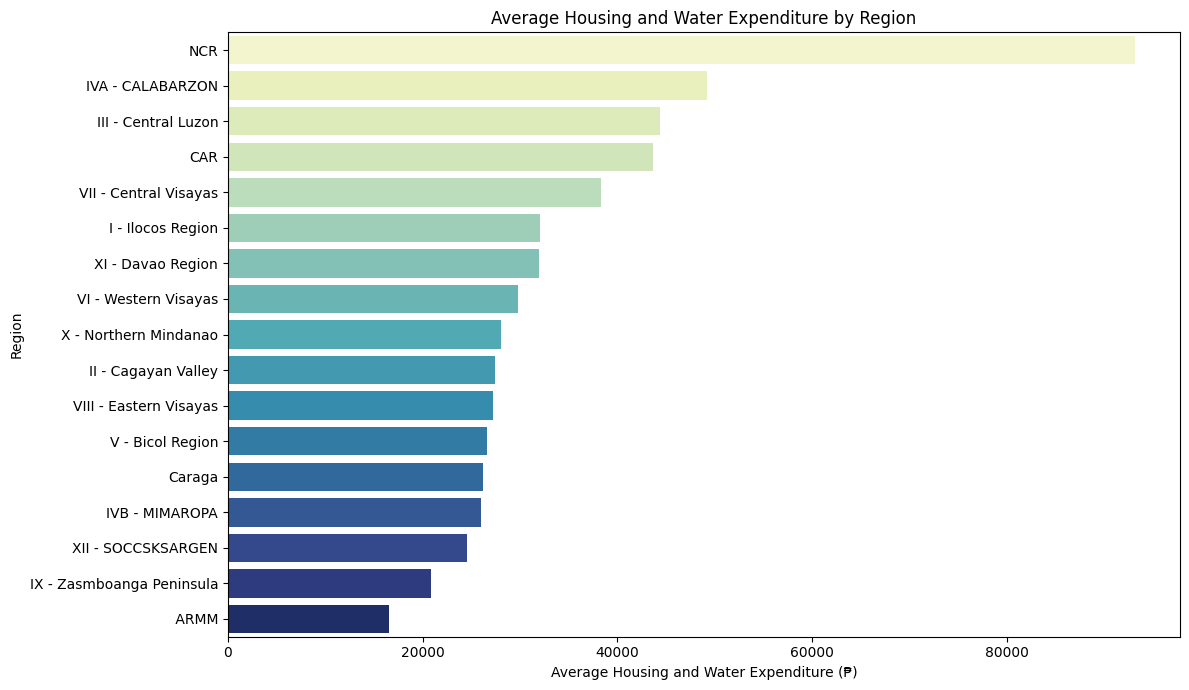

In [30]:
water_exp_df = water_exp.reset_index()

# Sort regions by expenditure (highest to lowest for better clarity)
water_exp_df = water_exp_df.sort_values("Average Housing and Water Expenditure", ascending=False)

# Create bar plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=water_exp_df,
    x="Average Housing and Water Expenditure",
    y="Region",
    palette="YlGnBu"
)
plt.xlabel("Average Housing and Water Expenditure (₱)")
plt.ylabel("Region")
plt.title("Average Housing and Water Expenditure by Region")
plt.tight_layout()
plt.show()

### Insight 13: 

The National Capital Region (NCR) has the highest average housing and water expenditure at ₱93,160, which is almost double that of the second-highest region, CALABARZON. This reflects the higher cost of living and urbanization in NCR, where housing prices, rent, and utility costs are significantly elevated. In contrast, ARMM has the lowest average expenditure at ₱16,503, indicating a lower cost of living and possibly less access to formal housing and utilities.

This suggests that urbanized regions tend to have higher housing and utility expenses, while more rural or less developed regions incur much lower costs.

<h1>Q14.  Which regions spend the most on communication?</h1>

In [31]:
comm_exp = filcome.groupby("Region")["Communication Expenditure"].mean().to_frame()
comm_exp.columns = ["Average Communication Expenditure"]
comm_exp = comm_exp.sort_values(by="Average Communication Expenditure", ascending=False)

comm_exp


,Average Communication Expenditure
Region,
NCR,10009.457143
IVA - CALABARZON,6445.308986
III - Central Luzon,5428.202039
I - Ilocos Region,3906.283646
CAR,3885.419130
VII - Central Visayas,3731.230224
XI - Davao Region,3193.574816
X - Northern Mindanao,3098.085851
VI - Western Visayas,3055.269028


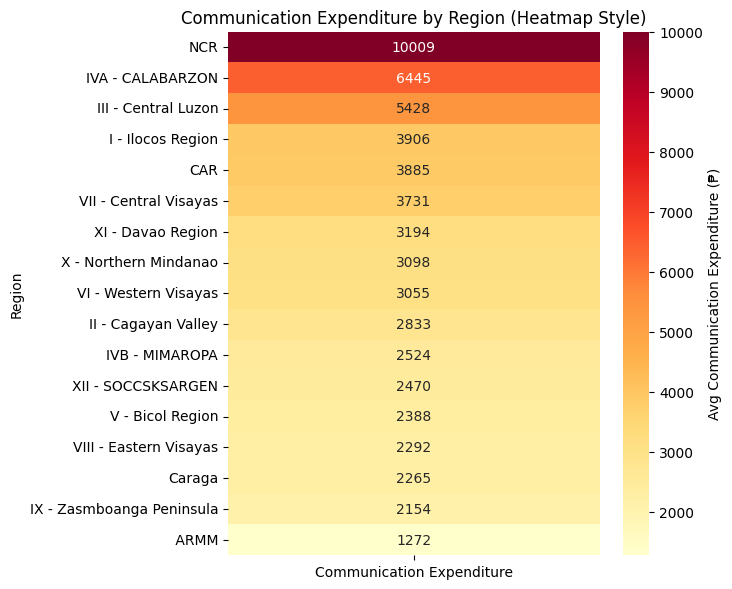

In [32]:
comm_exp_df = comm_exp.reset_index().sort_values("Average Communication Expenditure", ascending=False)

# Create a DataFrame suitable for heatmap (1 column with region as index)
heatmap_data = pd.DataFrame(
    comm_exp_df["Average Communication Expenditure"].values.reshape(-1, 1), 
    index=comm_exp_df["Region"], 
    columns=["Communication Expenditure"]
)

plt.figure(figsize=(6, len(heatmap_data)*0.4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Avg Communication Expenditure (₱)'}
)
plt.title("Communication Expenditure by Region (Heatmap Style)")
plt.xlabel("")
plt.ylabel("Region")
plt.show()

### Insight 14:

People in NCR spend the most on communication, followed by those in CALABARZON and Central Luzon. These areas are more developed, so people likely use more phones and internet. ARMM spends the least, which may mean they have less access or use fewer communication services.


<h1>Q15. Which region has the highest average number of children under 5 years old?</h1>

In [33]:
under5_avg = filcome.groupby("Region")["Members with age less than 5 year old"].mean().to_frame()
under5_avg.columns = ["Avg Children <5"]
under5_avg = under5_avg.sort_values(by="Avg Children <5", ascending=False)

under5_avg


,Avg Children <5
Region,
ARMM,0.514680
V - Bicol Region,0.475728
VIII - Eastern Visayas,0.457852
Caraga,0.446128
X - Northern Mindanao,0.441441
IX - Zasmboanga Peninsula,0.435682
VII - Central Visayas,0.427391
XII - SOCCSKSARGEN,0.416588
CAR,0.412174


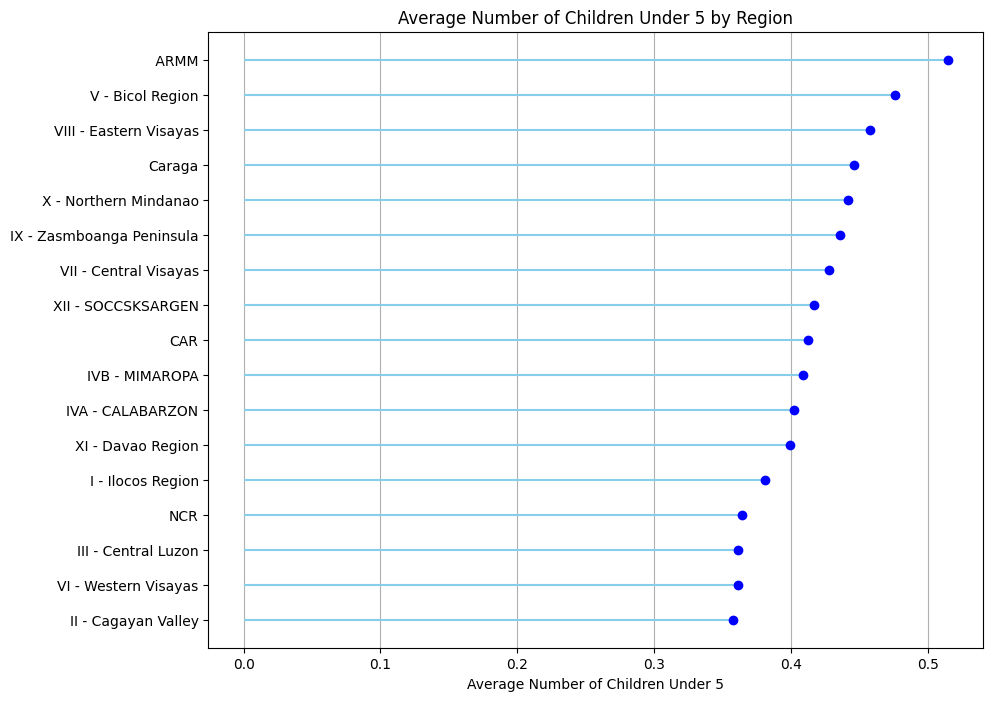

In [34]:
under5_df = under5_avg.reset_index().sort_values("Avg Children <5", ascending=True)

plt.figure(figsize=(10, 8))
plt.hlines(y=under5_df["Region"], xmin=0, xmax=under5_df["Avg Children <5"], color='skyblue')
plt.plot(under5_df["Avg Children <5"], under5_df["Region"], "o", color='blue')
plt.xlabel("Average Number of Children Under 5")
plt.title("Average Number of Children Under 5 by Region")
plt.grid(axis='x')
plt.show()

### Insight 15:

The ARMM region has the highest average number of children under 5 years old, followed by Bicol Region and Eastern Visayas. This suggests that regions with lower urbanization may have higher birth rates or larger young families compared to more developed areas like NCR, which has fewer young children on average.

<h1>Q16. Which region has the highest average number of employed family members?</h1>

In [35]:
employed_avg = filcome.groupby("Region")["Total number of family members employed"].mean().to_frame()
employed_avg.columns = ["Avg Employed Members"]
employed_avg = employed_avg.sort_values(by="Avg Employed Members", ascending=False)

employed_avg


,Avg Employed Members
Region,
NCR,1.515254
II - Cagayan Valley,1.505183
IVA - CALABARZON,1.482941
III - Central Luzon,1.456596
CAR,1.433043
VI - Western Visayas,1.333567
I - Ilocos Region,1.320273
X - Northern Mindanao,1.299947
XI - Davao Region,1.285364


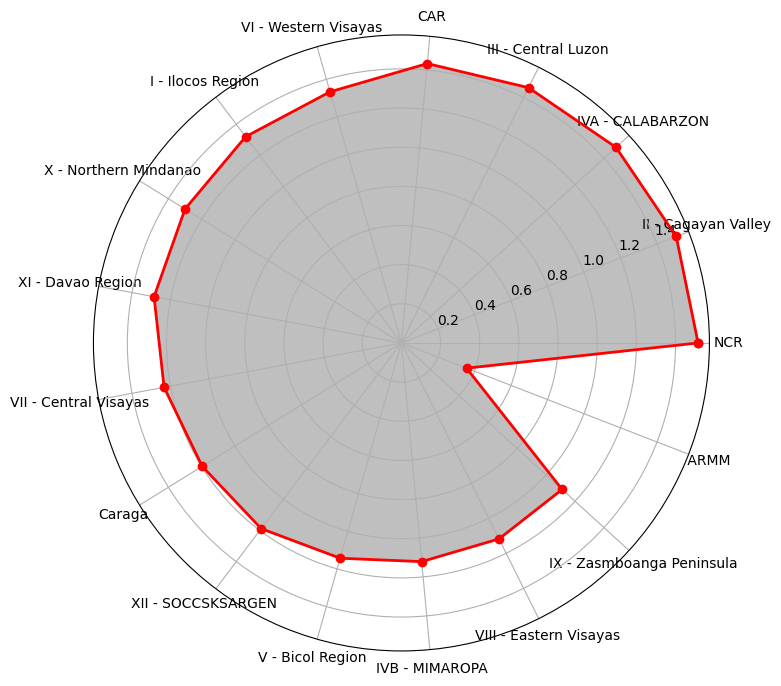

In [36]:

employed_df = employed_avg.reset_index()
regions = employed_df["Region"].tolist()
values = employed_df["Avg Employed Members"].tolist()

angles = np.linspace(0, 2 * np.pi, len(regions), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', color='red', linewidth=2)     # red line
ax.fill(angles, values, color='black', alpha=0.25)          # black fill
ax.set_thetagrids(np.degrees(angles[:-1]), regions)
ax.grid(True)
plt.show()

### Insight 16

The NCR (National Capital Region) has the highest average number of employed family members, followed closely by Cagayan Valley and CALABARZON. This suggests that more family members are working in highly urbanized or economically active regions, while regions like ARMM have significantly fewer employed family members on average.

<h1>Q17.  Which region has the highest average number of refrigerators or freezers per household?</h1>

In [37]:
ref_avg = filcome.groupby("Region")["Number of Refrigerator/Freezer"].mean().to_frame()
ref_avg.columns = ["Avg Refrigerators"]
ref_avg = ref_avg.sort_values(by="Avg Refrigerators", ascending=False)

ref_avg


,Avg Refrigerators
Region,
NCR,0.602906
IVA - CALABARZON,0.518741
III - Central Luzon,0.468953
I - Ilocos Region,0.456985
XI - Davao Region,0.453393
X - Northern Mindanao,0.409115
CAR,0.403478
Caraga,0.382716
II - Cagayan Valley,0.365480


In [38]:
heat_data = []
for region, row in ref_avg.iterrows():
    coords = region_coordinates.get(region)
    if coords:
        heat_data.append([coords[0], coords[1], row["Avg Refrigerators"]])

m = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)
HeatMap(heat_data).add_to(m)

m.save("refrigerators_heatmap.html")
m


### Insight 17: 

The NCR (National Capital Region) has the highest average number of refrigerators or freezers per household, followed by CALABARZON and Central Luzon. This indicates that households in more urbanized and developed regions tend to own more appliances, reflecting better access to electricity, higher income, and improved living standards. In contrast, regions like ARMM have very low ownership, suggesting limited access to such amenities.

<h1>Q18. Which region has the most motorized bancas?</h1>

In [39]:
banca_avg = filcome.groupby("Region")["Number of Motorized Banca"].mean().to_frame()
banca_avg.columns = ["Avg Motorized Bancas"]
banca_avg = banca_avg.sort_values(by="Avg Motorized Bancas", ascending=False)

banca_avg


,Avg Motorized Bancas
Region,
ARMM,0.049377
Caraga,0.030303
IX - Zasmboanga Peninsula,0.028523
IVB - MIMAROPA,0.024820
VIII - Eastern Visayas,0.023107
VI - Western Visayas,0.017187
VII - Central Visayas,0.012593
I - Ilocos Region,0.010221
XI - Davao Region,0.010221


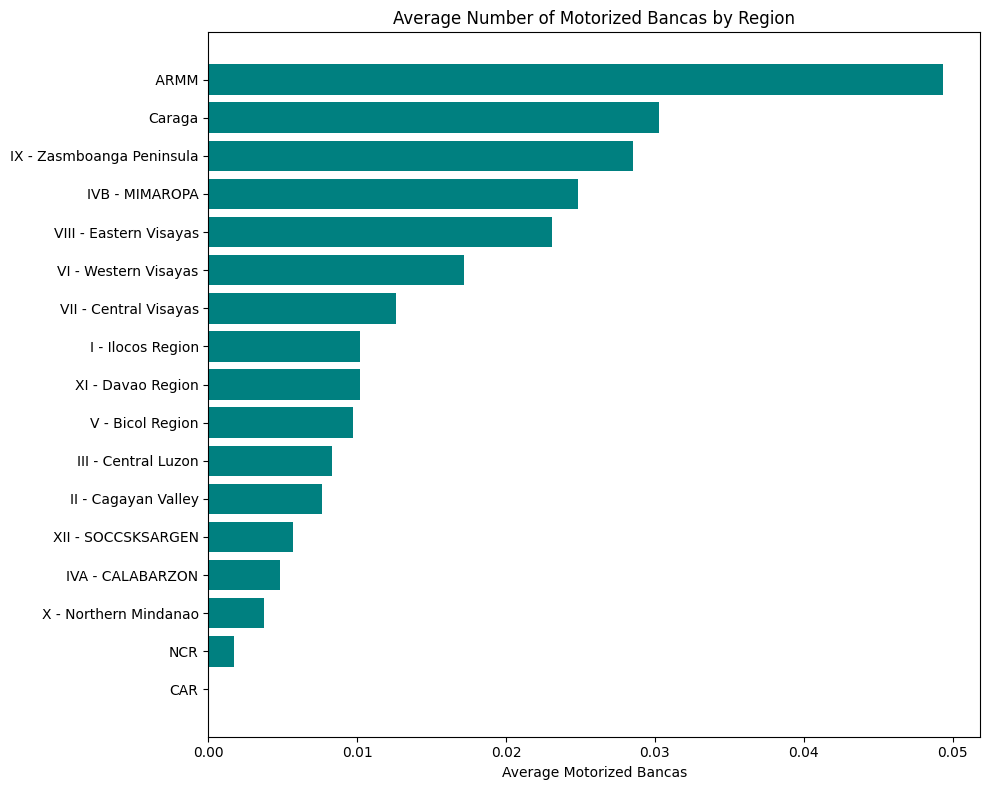

In [40]:
banca_avg_sorted = banca_avg.sort_values(by="Avg Motorized Bancas", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(banca_avg_sorted.index, banca_avg_sorted["Avg Motorized Bancas"], color='teal')
plt.xlabel("Average Motorized Bancas")
plt.title("Average Number of Motorized Bancas by Region")
plt.tight_layout()
plt.show()

### Insight 18 
    
ARMM has the most motorized bancas because it is a coastal region with many fishing communities. Motorized bancas are small boats used mainly for fishing and transportation across water. Since ARMM has many islands and coastal areas, households there tend to own more motorized bancas compared to other regions.

<h1>Q19. Which region spends the most on alcoholic beverages?</h1>

In [41]:
alcohol_avg = filcome.groupby("Region")["Alcoholic Beverages Expenditure"].mean().to_frame()
alcohol_avg.columns = ["Avg Alcohol Expenditure"]
alcohol_avg = alcohol_avg.sort_values(by="Avg Alcohol Expenditure", ascending=False)

alcohol_avg


,Avg Alcohol Expenditure
Region,
II - Cagayan Valley,1746.317711
VI - Western Visayas,1627.401613
NCR,1433.314286
IVB - MIMAROPA,1385.285829
I - Ilocos Region,1374.896082
VII - Central Visayas,1141.342385
VIII - Eastern Visayas,1096.986735
XII - SOCCSKSARGEN,1070.154100
III - Central Luzon,1057.337658


In [42]:
heat_data = []
for region, row in alcohol_avg.iterrows():
    coords = region_coordinates.get(region)
    if coords:
        heat_data.append([coords[0], coords[1], row["Avg Alcohol Expenditure"]])

m = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)
HeatMap(heat_data).add_to(m)

m.save("alcohol_expenditure_heatmap.html")
m


### Insight 19

The region that spends the most on alcoholic beverages is II - Cagayan Valley, with an average expenditure of 1,746.32. This is followed by VI - Western Visayas and NCR, showing that both rural and urban areas contribute significantly to alcohol spending. Meanwhile, ARMM has the lowest average spending on alcoholic beverages.

<h1>Q20.  Where is tobacco spending the highest?</h1>

In [43]:
tobacco_avg = filcome.groupby("Region")["Tobacco Expenditure"].mean().to_frame()
tobacco_avg.columns = ["Avg Tobacco Expenditure"]
tobacco_avg = tobacco_avg.sort_values(by="Avg Tobacco Expenditure", ascending=False)

tobacco_avg

,Avg Tobacco Expenditure
Region,
III - Central Luzon,3859.165585
IVA - CALABARZON,3076.826766
XII - SOCCSKSARGEN,2717.094251
NCR,2670.246247
XI - Davao Region,2291.449305
VI - Western Visayas,2270.504384
II - Cagayan Valley,2177.875169
V - Bicol Region,1947.257282
IVB - MIMAROPA,1889.853483


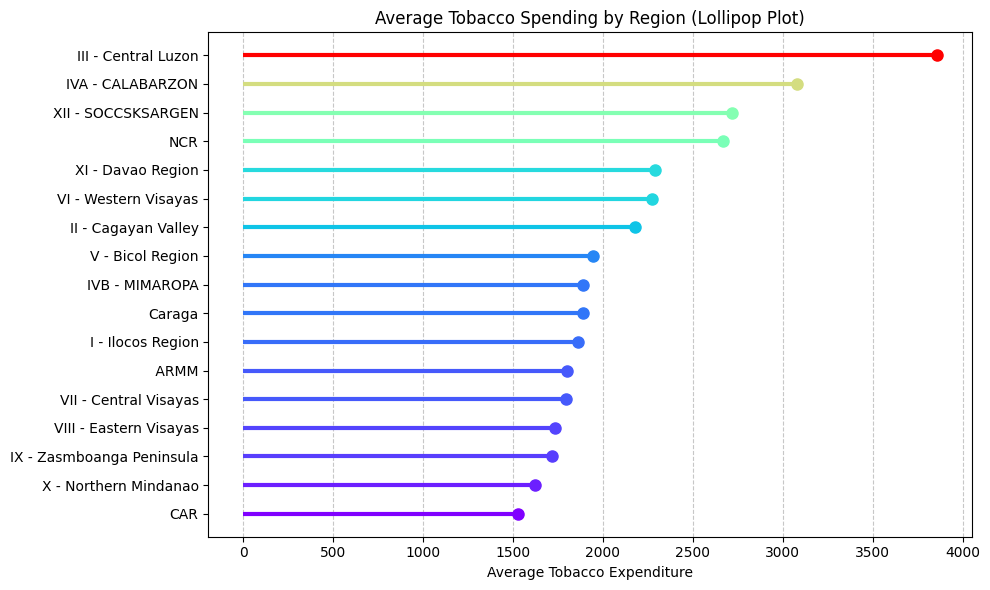

In [45]:

mean_tobacco = filcome.groupby('Region')['Tobacco Expenditure'].mean().sort_values()

plt.figure(figsize=(10,6))

# Normalize the values to [0,1] for colormap
norm = plt.Normalize(mean_tobacco.min(), mean_tobacco.max())
colors = plt.cm.rainbow(norm(mean_tobacco.values))

# Draw horizontal lines with rainbow colors
for y, x, c in zip(mean_tobacco.index, mean_tobacco.values, colors):
    plt.hlines(y, 0, x, color=c, linewidth=3)
    plt.plot(x, y, "o", color=c, markersize=8)

plt.xlabel('Average Tobacco Expenditure')
plt.title('Average Tobacco Spending by Region (Lollipop Plot)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight 20

The region with the highest average tobacco spending is III - Central Luzon with 3,859.17 pesos. This is followed by IVA - CALABARZON and XII - SOCCSKSARGEN. Tobacco spending is generally higher in these regions compared to others, indicating that tobacco consumption or expenditure is more significant in Central Luzon and nearby regions.